In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
attrition_percentage = df["Attrition"].value_counts(normalize=True) * 100
attrition_count = df["Attrition"].value_counts()

print(attrition_percentage)
print(attrition_count)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64
Attrition
No     1233
Yes     237
Name: count, dtype: int64


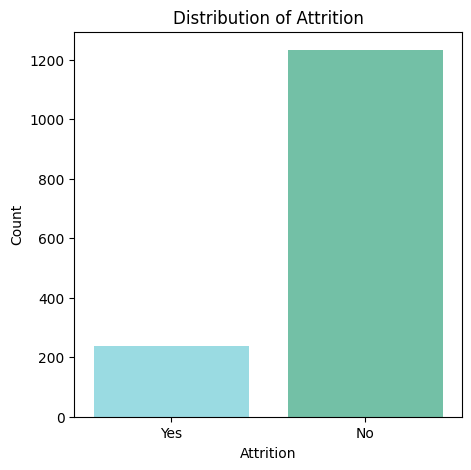

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x="Attrition", palette=['#8EE5EE',"#66CDAA"])
plt.title("Distribution of Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

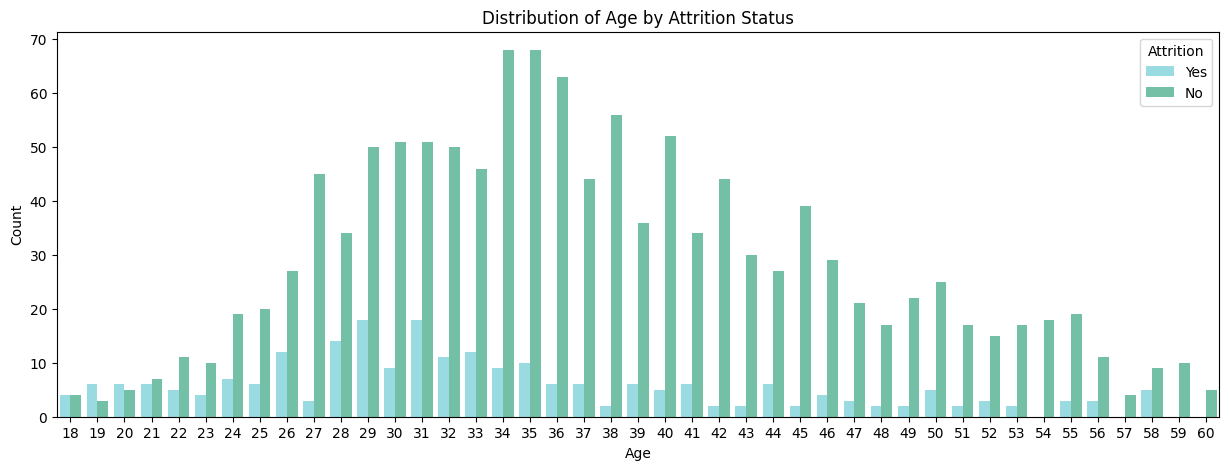

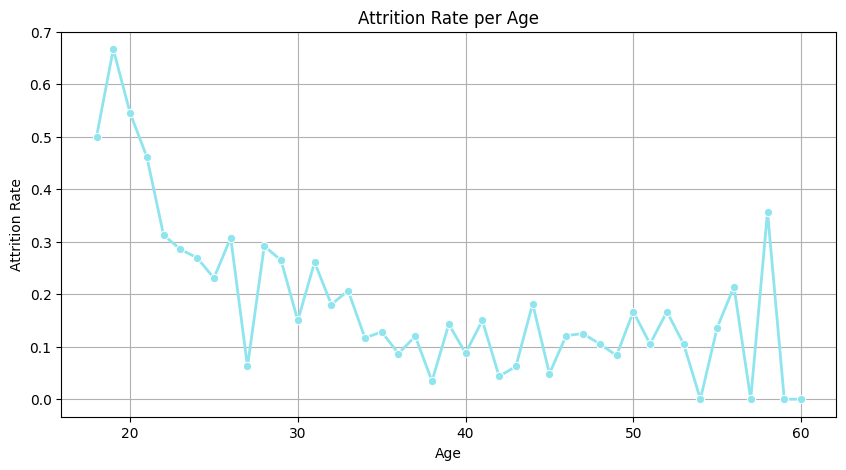

In [ ]:
# Distribution of Age, compared by Attrition
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="Age", hue="Attrition", palette=['#8EE5EE',"#66CDAA"])
plt.title("Distribution of Age by Attrition Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Distribution of AttritionRate per Age
temp_df = df.copy()
temp_df['Attrition'] = temp_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
age_attrition_rate = temp_df.groupby('Age')['Attrition'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=age_attrition_rate.index, y=age_attrition_rate.values, marker='o', color='#8EE5EE', linewidth=2)
plt.title('Attrition Rate per Age')
plt.xlabel('Age')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()

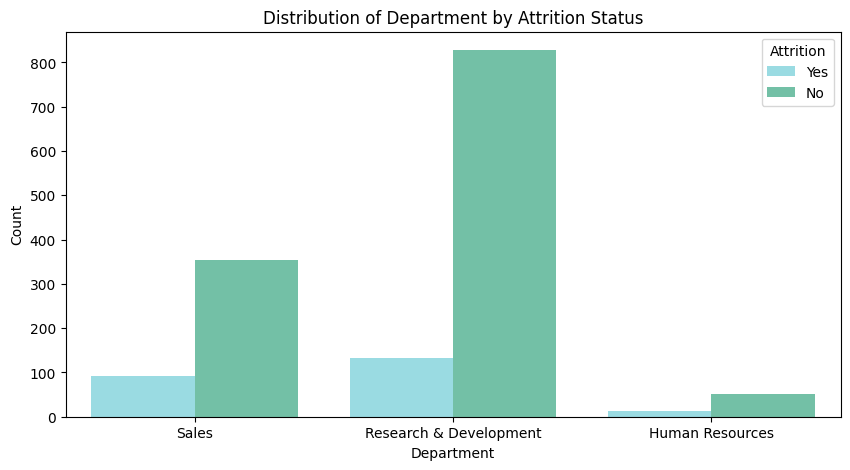

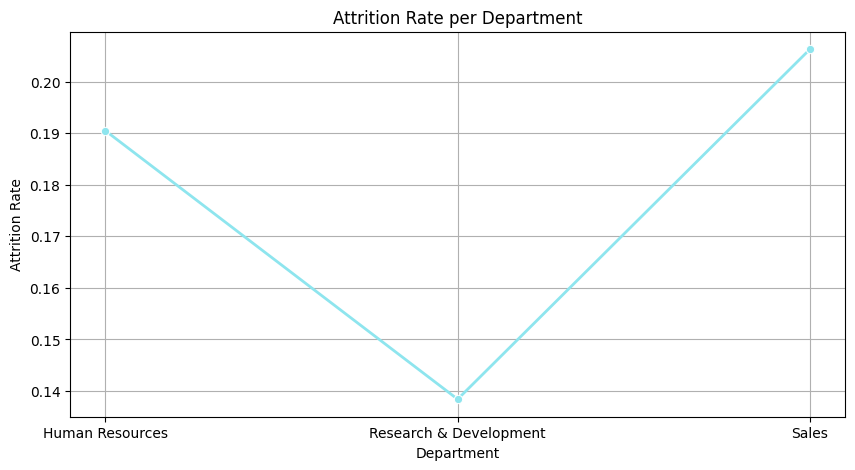

In [ ]:
# Distribution of Department, compared by Attrition
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Department", hue="Attrition", palette=['#8EE5EE',"#66CDAA"])
plt.title("Distribution of Department by Attrition Status")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

# Distribution of AttritionRate per Department
department_attrition_rate = temp_df.groupby('Department')['Attrition'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=department_attrition_rate.index, y=department_attrition_rate.values, marker='o', color='#8EE5EE', linewidth=2)
plt.title('Attrition Rate per Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()

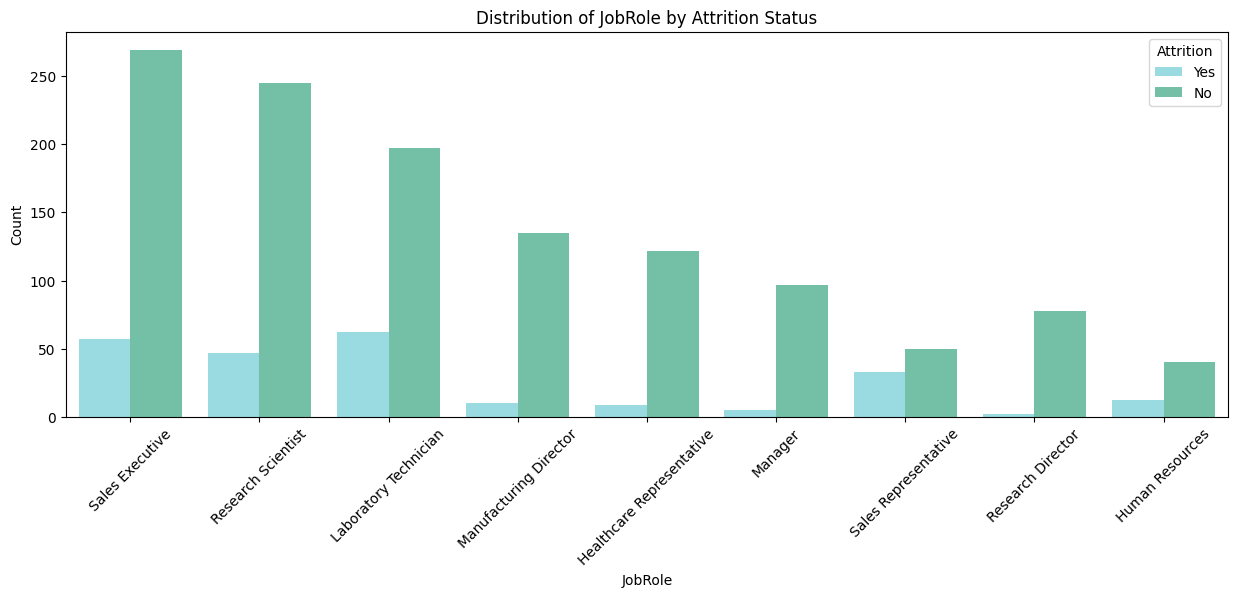

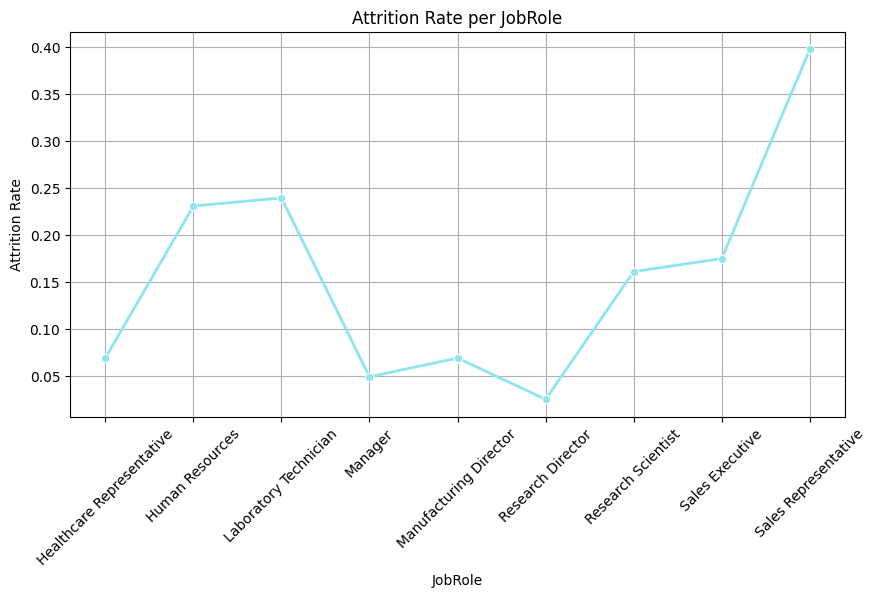

In [ ]:
# Distribution of JobRole, compared by Attrition
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="JobRole", hue="Attrition", palette=['#8EE5EE',"#66CDAA"])
plt.title("Distribution of JobRole by Attrition Status")
plt.xlabel("JobRole")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

# Distribution of AttritionRate per JobRole
jobrole_attrition_rate = temp_df.groupby('JobRole')['Attrition'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=jobrole_attrition_rate.index, y=jobrole_attrition_rate.values, marker='o', color='#8EE5EE', linewidth=2)
plt.title('Attrition Rate per JobRole')
plt.xlabel('JobRole')
plt.xticks(rotation=45)
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()

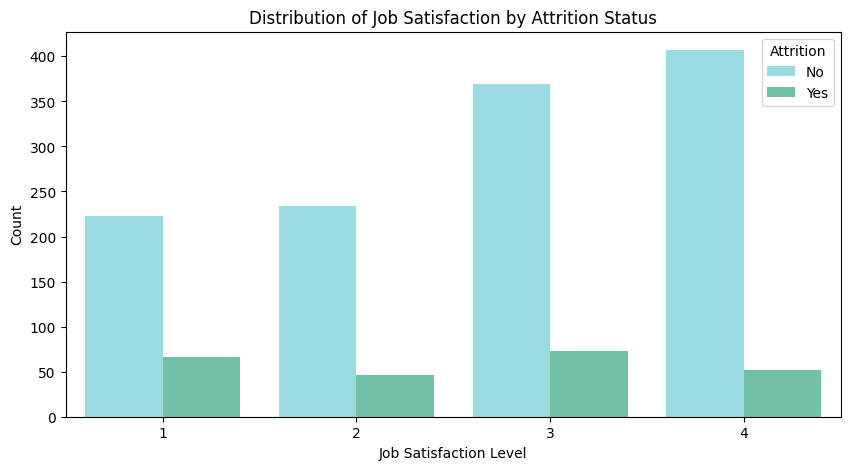

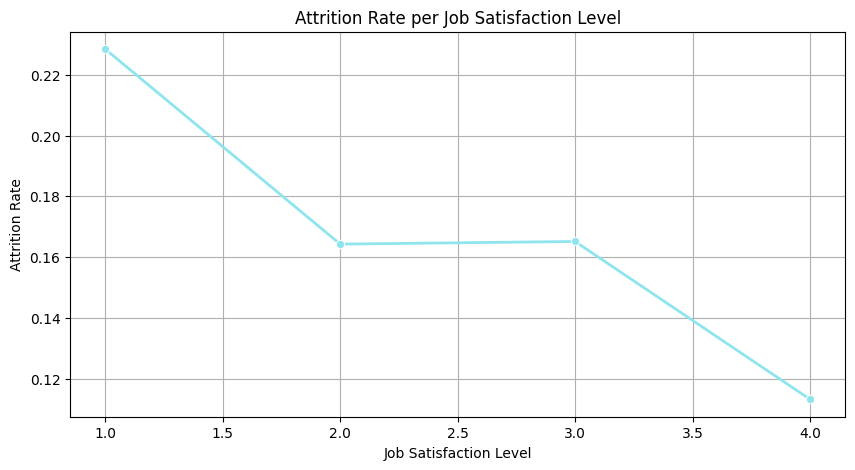

In [ ]:
# Distribution of JobSatisfaction, compared by Attrition
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition", palette=['#8EE5EE',"#66CDAA"])
plt.title("Distribution of Job Satisfaction by Attrition Status")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Count")
plt.show()

# Distribution of Attrition Rate per JobSatisfaction
job_satisfaction_attrition = temp_df.groupby('JobSatisfaction')['Attrition'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=job_satisfaction_attrition.index, y=job_satisfaction_attrition.values, marker='o', color='#8EE5EE', linewidth=2)
plt.title('Attrition Rate per Job Satisfaction Level')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()

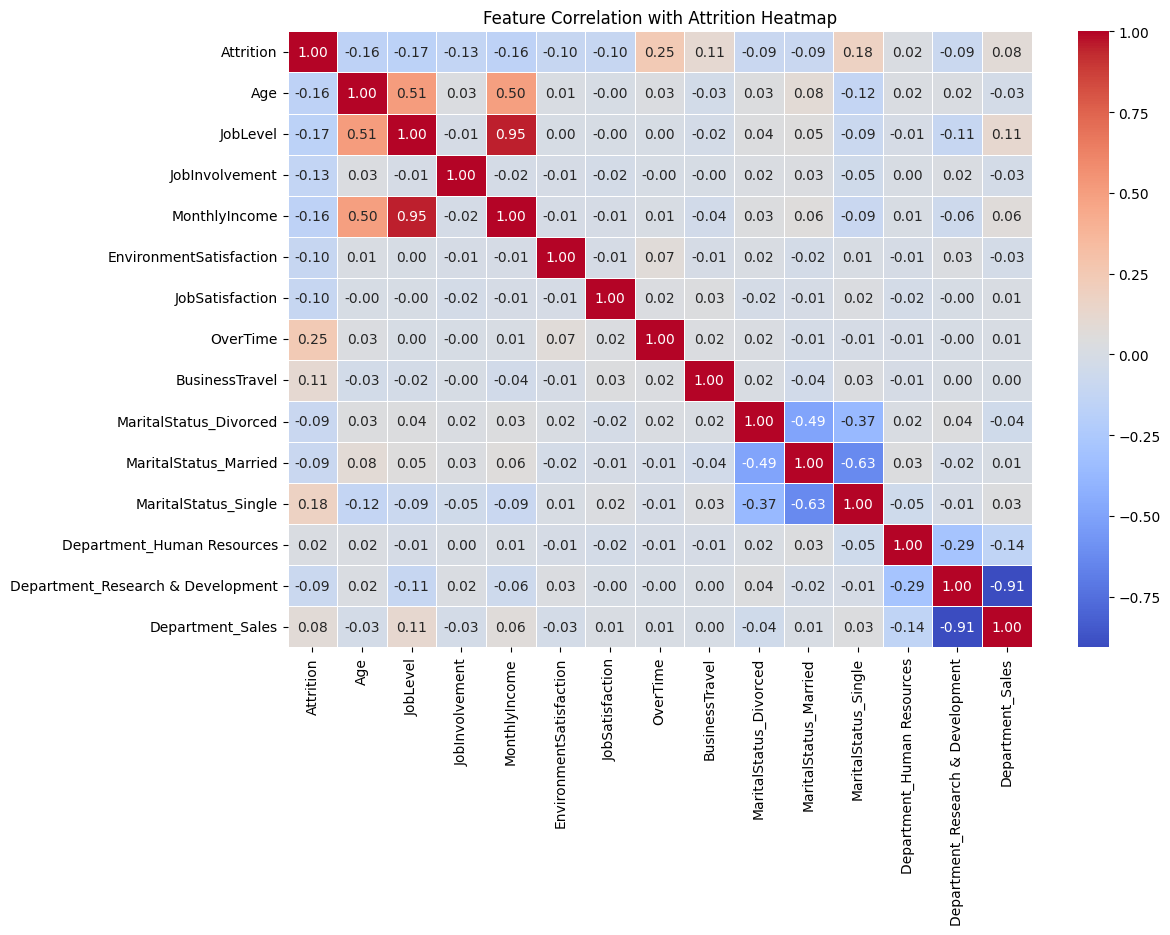

In [ ]:
# Convert categorical 'Attrition' to numerical (Yes=1, No=0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Frequently': 2,'Travel_Rarely': 1, 'Non-travel': 0})

# Define the features including Attrition
high_impact_features = [
    'Attrition','Age', 'MaritalStatus',
    'JobLevel', 'JobInvolvement', 'Department',
    'MonthlyIncome', 'EnvironmentSatisfaction', 'JobSatisfaction', 'OverTime', 'BusinessTravel'

]

# Convert categorical features to numerical values
df_encoded = pd.get_dummies(df[high_impact_features])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()


plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)


plt.title("Feature Correlation with Attrition Heatmap")
plt.show()


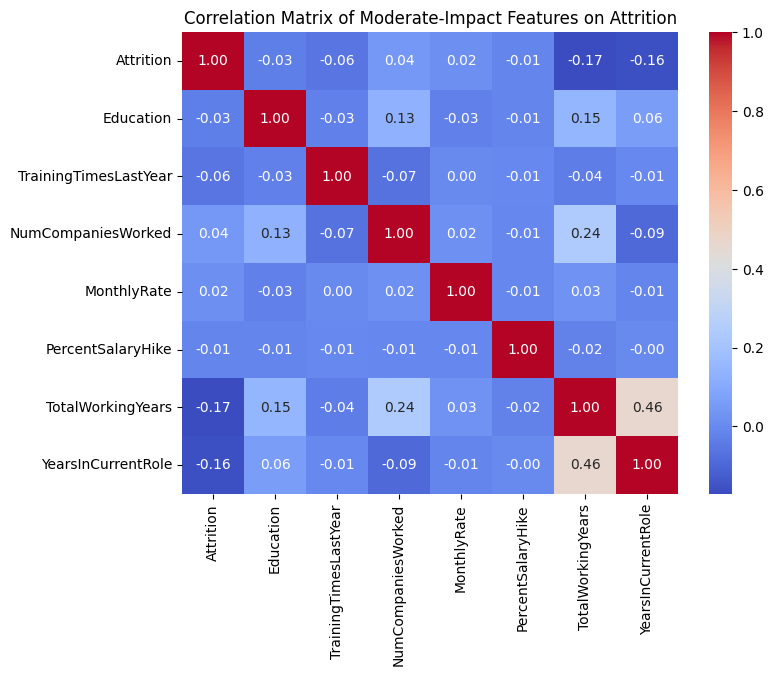

In [ ]:
moderate_impact_features = [
    'Attrition', 'Education', 'TrainingTimesLastYear', 'NumCompaniesWorked', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsInCurrentRole'
]

# Compute the correlation matrix
correlation_matrix = df[moderate_impact_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Moderate-Impact Features on Attrition')
plt.show()

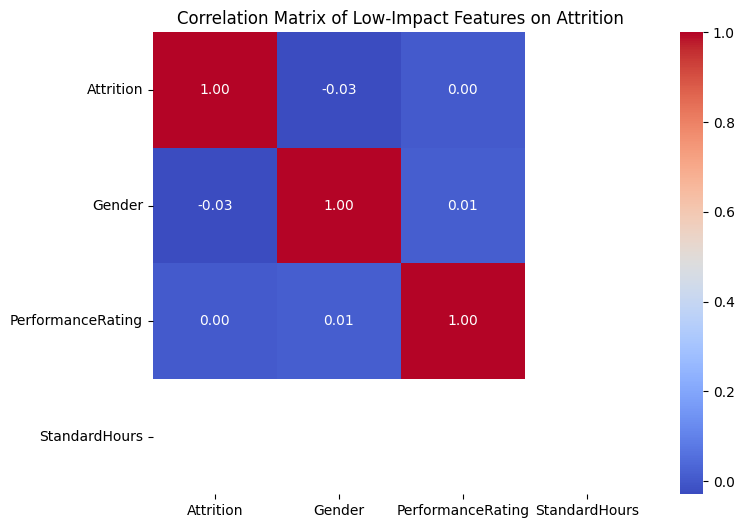

In [ ]:
# Convert categorical features to numerical for correlation analysis
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

low_impact_features = [
    'Attrition', 'Gender', 'PerformanceRating', 'StandardHours' ]

# Compute the correlation matrix
correlation_matrix = df[low_impact_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Low-Impact Features on Attrition')
plt.show()

In [ ]:
#Deleting features that are not needed
deletable_features = ['TotalWorkingYears', 'YearsInCurrentRole',
                      'Gender', 'PerformanceRating', 'StandardHours', 'HourlyRate', 'Over18', 'EmployeeCount', 'EmployeeNumber']
df = df.drop(columns=deletable_features)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1.0,1102,Sales,1,2,Life Sciences,2,3,2,Sales Executive,4,Single,5993,19479,8,1,11,1,0,0,1,6,0,5
1,49,0,2.0,279,Research & Development,8,1,Life Sciences,3,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,1,3,3,10,1,7
2,37,1,1.0,1373,Research & Development,2,2,Other,4,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,2,0,3,3,0,0,0
3,33,0,2.0,1392,Research & Development,3,4,Life Sciences,4,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,0,3,3,8,3,0
4,27,0,1.0,591,Research & Development,2,1,Medical,1,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,4,1,3,3,2,2,2


In [ ]:
# Define bins and labels for MonthlyRate
monthly_rate_bins = [2000, 8000, 14000, 20000, 26000, 30000]
monthly_rate_labels = ['2000-8000', '8001-14000', '14001-20000', '20001-26000', '26001-30000']
df['MonthlyRateCategory'] = pd.cut(df['MonthlyRate'], bins=monthly_rate_bins, labels=monthly_rate_labels, right=False)

# Define bins and labels for MonthlyIncome
monthly_income_bins = [1000, 5000, 10000, 15000, 20000]
monthly_income_labels = ['1000-5000', '5001-10000', '10001-15000', '15001-20000']
df['MonthlyIncomeCategory'] = pd.cut(df['MonthlyIncome'], bins=monthly_income_bins, labels=monthly_income_labels, right=False)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyRateCategory,MonthlyIncomeCategory
0,41,1,1.0,1102,Sales,1,2,Life Sciences,2,3,2,Sales Executive,4,Single,5993,19479,8,1,11,1,0,0,1,6,0,5,14001-20000,5001-10000
1,49,0,2.0,279,Research & Development,8,1,Life Sciences,3,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,1,3,3,10,1,7,20001-26000,5001-10000
2,37,1,1.0,1373,Research & Development,2,2,Other,4,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,2,0,3,3,0,0,0,2000-8000,1000-5000
3,33,0,2.0,1392,Research & Development,3,4,Life Sciences,4,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,0,3,3,8,3,0,20001-26000,1000-5000
4,27,0,1.0,591,Research & Development,2,1,Medical,1,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,4,1,3,3,2,2,2,14001-20000,1000-5000


In [ ]:
df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0], inplace=True)

In [ ]:
# Define target variable and features
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Print dataset sizes
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (1176, 25), Test set: (294, 25)


In [ ]:
# Define categorical and numerical features
categorical_features = [
    "BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus",
    "MonthlyRateCategory", "MonthlyIncomeCategory", "Education", "EnvironmentSatisfaction",
    "JobInvolvement", "JobLevel", "JobSatisfaction", "RelationshipSatisfaction",
    "StockOptionLevel", "WorkLifeBalance"
]

numerical_features = [
    "Age", "DailyRate", "DistanceFromHome", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
    "OverTime", "PercentSalaryHike", "TrainingTimesLastYear", "YearsAtCompany",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]

# Preprocessing steps
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer([
    ("num", Pipeline([("imputer", imputer), ("scaler", scaler)]), numerical_features),
    ("cat", encoder, categorical_features)
])

In [ ]:
# Create model
forest = RandomForestClassifier(class_weight='balanced',random_state=42)

# Create pipeline for preprocessing and model training
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", forest)
])

In [ ]:
# Define target variable and features
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# ----> Create 'MonthlyRateCategory' and 'MonthlyIncomeCategory' before the split
# Define bins and labels for MonthlyRate
monthly_rate_bins = [2000, 8000, 14000, 20000, 26000, 30000]
monthly_rate_labels = ['2000-8000', '8001-14000', '14001-20000', '20001-26000', '26001-30000']
X['MonthlyRateCategory'] = pd.cut(X['MonthlyRate'], bins=monthly_rate_bins, labels=monthly_rate_labels, right=False)

# Define bins and labels for MonthlyIncome
monthly_income_bins = [1000, 5000, 10000, 15000, 20000]
monthly_income_labels = ['1000-5000', '5001-10000', '10001-15000', '15001-20000']
X['MonthlyIncomeCategory'] = pd.cut(X['MonthlyIncome'], bins=monthly_income_bins, labels=monthly_income_labels, right=False)
# <----

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Print dataset sizes
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (1176, 27), Test set: (294, 27)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Use 'df' instead of 'data'
X = df.drop('Attrition', axis=1)
y = df.Attrition

# ----> Create 'MonthlyRateCategory' and 'MonthlyIncomeCategory' before the split
# Define bins and labels for MonthlyRate
monthly_rate_bins = [2000, 8000, 14000, 20000, 26000, 30000]
monthly_rate_labels = ['2000-8000', '8001-14000', '14001-20000', '20001-26000', '26001-30000']
X['MonthlyRateCategory'] = pd.cut(X['MonthlyRate'], bins=monthly_rate_bins, labels=monthly_rate_labels, right=False)

# Define bins and labels for MonthlyIncome
monthly_income_bins = [1000, 5000, 10000, 15000, 20000]
monthly_income_labels = ['1000-5000', '5001-10000', '10001-15000', '15001-20000']
X['MonthlyIncomeCategory'] = pd.cut(X['MonthlyIncome'], bins=monthly_income_bins, labels=monthly_income_labels, right=False)
# <----


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

# Define categorical and numerical features
categorical_features = [
    "BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus",
    "MonthlyRateCategory", "MonthlyIncomeCategory", "Education", "EnvironmentSatisfaction",
    "JobInvolvement", "JobLevel", "JobSatisfaction", "RelationshipSatisfaction",
    "StockOptionLevel", "WorkLifeBalance", 'OverTime' # Add 'OverTime' to categorical features
]

numerical_features = [
    "Age", "DailyRate", "DistanceFromHome", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
    "PercentSalaryHike", "TrainingTimesLastYear", "YearsAtCompany",
    "YearsSinceLastPromotion", "YearsWithCurrManager" # Remove 'OverTime' from numerical features
]


# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Fit and transform the data
X_train_std = preprocessor.fit_transform(X_train)
X_test_std = preprocessor.transform(X_test)
X_std = preprocessor.transform(X)

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [ ]:
y_test.value_counts()[0] / y_test.shape[0]

np.float64(0.8390022675736961)

In [ ]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')

lr_clf.fit(X_train_std, y_train)
evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[845  18]
 [ 73  93]]
ACCURACY SCORE:
0.9116
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.920479    0.837838  0.911565     0.879159      0.907147
recall       0.979143    0.560241  0.911565     0.769692      0.911565
f1-score     0.948905    0.671480  0.911565     0.810193      0.904150
support    863.000000  166.000000  0.911565  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[354  16]
 [ 39  32]]
ACCURACY SCORE:
0.8753
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.900763   0.666667  0.875283    0.783715      0.863074
recall       0.956757   0.450704  0.875283    0.703730      0.875283
f1-score     0.927916   0.537815  0.875283    0.732866      0.865111
support    370.000000  71.000000  0.875283  441.000000    441.000000


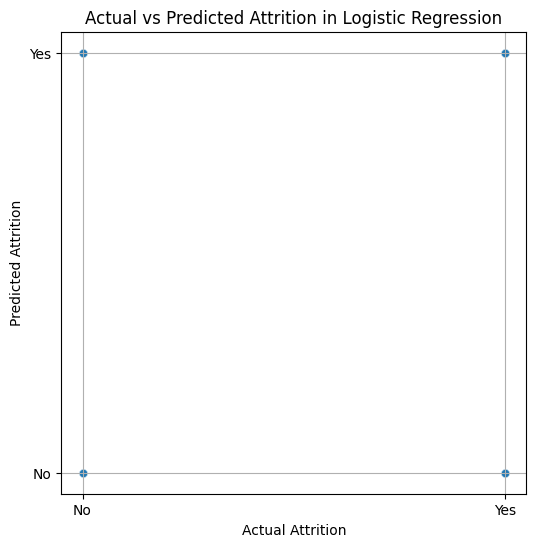

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Predict on the test set
y_pred = lr_clf.predict(X_test_std)

# Convert from 'Yes'/'No' if needed
if y_test.dtype == 'O':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_test_enc = le.fit_transform(y_test)
    y_pred_enc = le.transform(y_pred)
else:
    y_test_enc = y_test
    y_pred_enc = y_pred

# Create a scatterplot: actual vs predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_enc, y=y_pred_enc, alpha=0.6)
plt.xlabel("Actual Attrition")
plt.ylabel("Predicted Attrition")
plt.title("Actual vs Predicted Attrition in Logistic Regression")
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.grid(True)
plt.show()


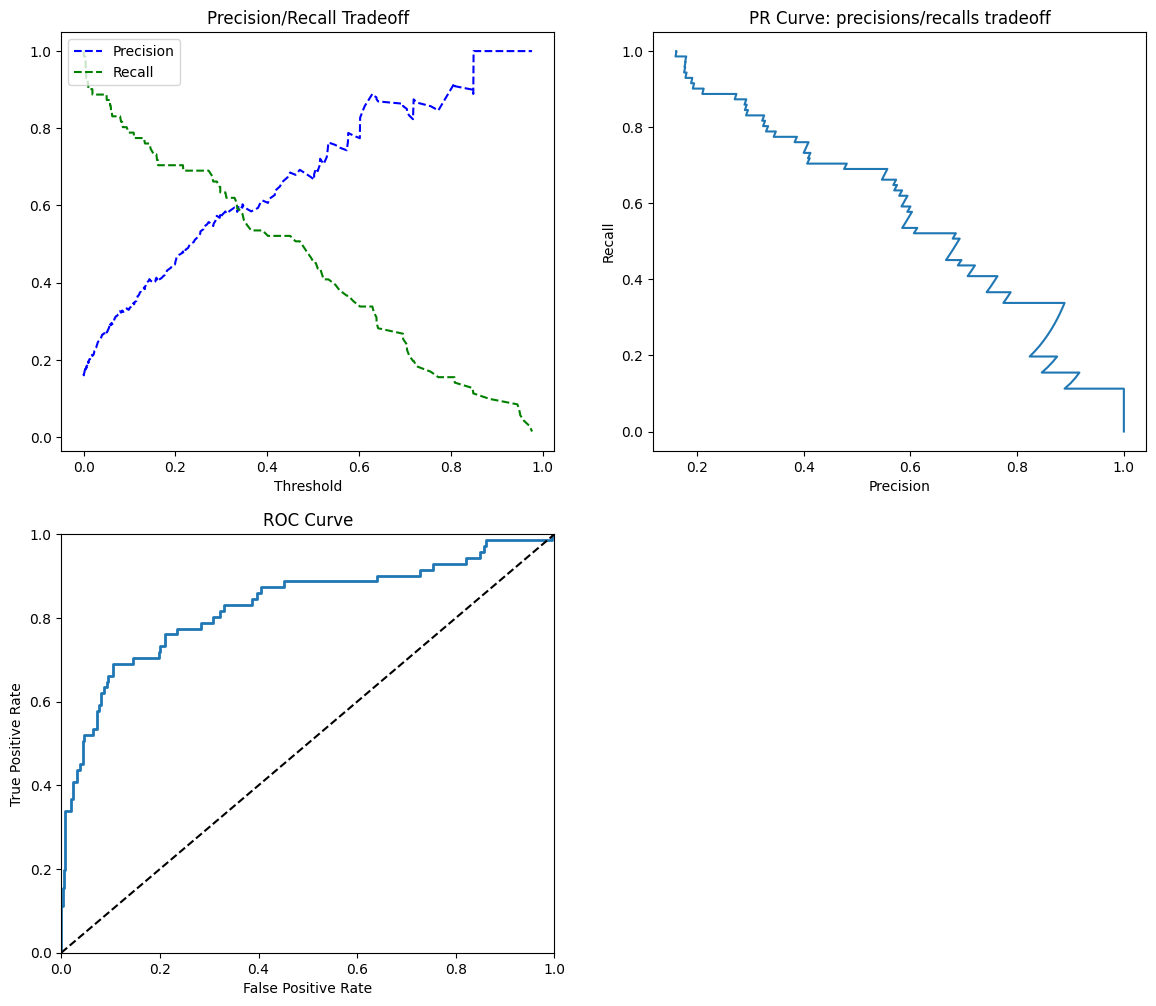

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

# Convert y_test to numerical values (0 and 1) if needed
# If y_test already contains 0 and 1, this step is not needed
if y_test.dtype == object:  # Check if y_test is of object type (likely containing strings)
    y_test_numeric = y_test.map({'No': 0, 'Yes': 1})
else:
    y_test_numeric = y_test  # If already numerical, use it directly


# Now use y_test_numeric in precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test_numeric, lr_clf.predict_proba(X_test_std)[:, 1])
# The y_test likely contains 'Yes' and 'No' instead of 0 and 1.
# Since lr_clf.predict_proba returns probabilities for each class,
# we need to select the probabilities for the positive class (class 1, which represents attrition)
# using [:, 1]. This will give us a 1D array of probabilities which is expected by the precision_recall_curve function.

plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

# Use y_test_numeric in roc_curve as well
plt.subplot(4, 2, 3)
fpr, tpr, thresholds_roc = roc_curve(y_test_numeric, lr_clf.predict_proba(X_test_std)[:, 1]) # Change here as well
plot_roc_curve(fpr, tpr)

In [ ]:
# Before calculating the ROC AUC score
y_train = y_train.map({'Yes': 1, 'No': 0}).fillna(0)  # Replace NaN with 0 in y_train
y_test = y_test.map({'Yes': 1, 'No': 0}).fillna(0)    # Replace NaN with 0 in y_test

scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict_proba(X_train_std)[:, 1]),
        'Test': roc_auc_score(y_test, lr_clf.predict_proba(X_test_std)[:, 1]),
    },
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create a LabelEncoder object (if not already created)
le = LabelEncoder()

# ... (your previous code) ...

# Define categorical and numerical features
categorical_features = [
    "BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus",
    "MonthlyRateCategory", "MonthlyIncomeCategory", "Education", "EnvironmentSatisfaction",
    "JobInvolvement", "JobLevel", "JobSatisfaction", "RelationshipSatisfaction",
    "StockOptionLevel", "WorkLifeBalance", 'OverTime'
]

numerical_features = [
    "Age", "DailyRate", "DistanceFromHome", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
    "PercentSalaryHike", "TrainingTimesLastYear", "YearsAtCompany",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),  # Use OneHotEncoder
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Fit and transform the data using preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Now create and train the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False)
rf_clf.fit(X_train_transformed, y_train)  # Use transformed data

# Evaluate the model using transformed data
evaluate(rf_clf, X_train_transformed, X_test_transformed, y_train, y_test)

TRAINING RESULTS:
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0

TESTING RESULTS:
CONFUSION MATRIX:
[[363   7]
 [ 58  13]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.862233   0.650000  0.852608    0.756116      0.828064
recall       0.981081   0.183099  0.852608    0.582090      0.852608
f1-score     0.917826   0.285714  0.852608    0.601770      0.816057
support    370.000000  71.000000  0.852608  441.000000    441.000000


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Check data shape
print(X_train_transformed.shape, X_test_transformed.shape)
print(y_train.shape, y_test.shape)

# Check for NaN values
import numpy as np
print(np.isnan(X_train_transformed).sum(), np.isnan(X_test_transformed).sum())

# Run a small grid search to test
test_param_grid = {'n_estimators': [100], 'max_depth': [3]}
search = GridSearchCV(rf_clf, test_param_grid, scoring='roc_auc', cv=2, verbose=1, n_jobs=-1)
search.fit(X_train_transformed, y_train)


(1029, 80) (441, 80)
(1029,) (441,)
0 0
Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(bootstrap=False), n_jobs=-1,
             param_grid={'max_depth': [3], 'n_estimators': [100]},
             scoring='roc_auc', verbose=1)

In [ ]:

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X_train, X_test, y_train, y_test are already defined and split

# Define categorical and numerical features
categorical_features = [
    "BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus",
    "MonthlyRateCategory", "MonthlyIncomeCategory", "Education", "EnvironmentSatisfaction",
    "JobInvolvement", "JobLevel", "JobSatisfaction", "RelationshipSatisfaction",
    "StockOptionLevel", "WorkLifeBalance", 'OverTime'
]

numerical_features = [
    "Age", "DailyRate", "DistanceFromHome", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
    "PercentSalaryHike", "TrainingTimesLastYear", "YearsAtCompany",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])


# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the same preprocessor
X_test_transformed = preprocessor.transform(X_test)


# Initialize and train the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train_transformed, y_train)

# Evaluate the model
def evaluate(model, X_train, X_test, y_train, y_test):
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))


    print(f"Testing Accuracy: {test_acc:.4f}")

evaluate(xgb_clf, X_train_transformed, X_test_transformed, y_train, y_test)  # Use transformed data for evaluation

Testing Accuracy: 1.0000


In [ ]:
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are your data
# ... (your other code) ...

# Create a copy of X_train and X_test to avoid modifying the originals
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Assuming these are your categorical columns:
# Remove 'Gender' and 'Over18' from categorical_cols as they have been dropped
categorical_cols = ["Department", "EducationField", "JobRole", "MaritalStatus", "OverTime", "MonthlyRateCategory", "MonthlyIncomeCategory", "BusinessTravel", "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]

# Loop through categorical features and convert to 'category' dtype
for feature in categorical_cols:
    X_train_encoded[feature] = X_train_encoded[feature].astype('category')
    X_test_encoded[feature] = X_test_encoded[feature].astype('category')

# Now train your XGBoost model
# Make sure to enable `enable_categorical=True` if you want to directly use pandas categories
xgb_clf = XGBClassifier(enable_categorical=True, random_state=42)
xgb_clf.fit(X_train_encoded, y_train)  # Use the original y_train

# Now you should be able to calculate the ROC AUC score
scores_dict['XGBoost'] = {
    'Train': roc_auc_score(y_train, xgb_clf.predict_proba(X_train_encoded)[:, 1]),  # Use the original y_train
    'Test': roc_auc_score(y_test, xgb_clf.predict_proba(X_test_encoded)[:, 1]),    # Use the original y_test
}

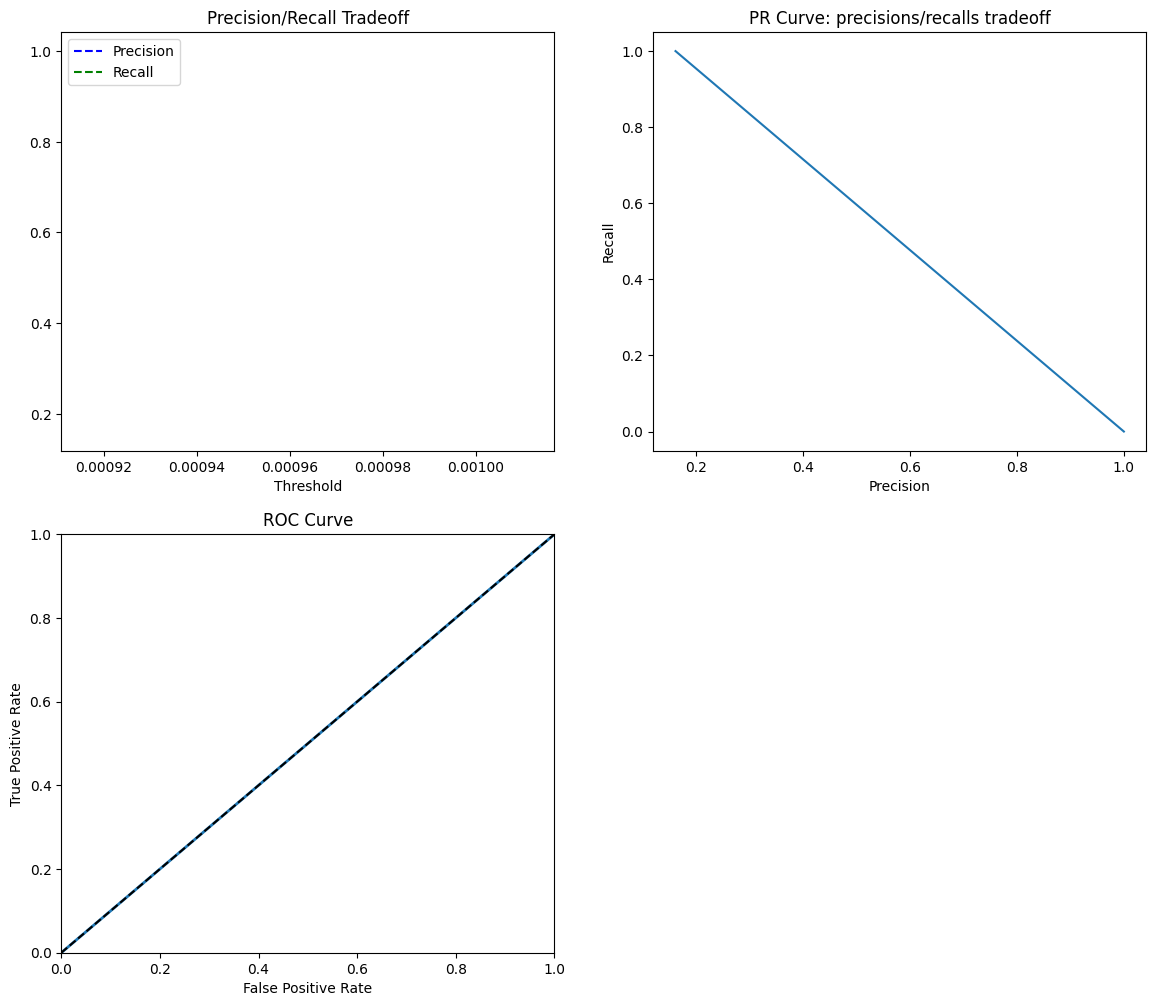

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test_numeric, xgb_clf.predict_proba(X_test_encoded)[:, 1])
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds_roc = roc_curve(y_test_numeric, xgb_clf.predict_proba(X_test_encoded)[:, 1])
plot_roc_curve(fpr, tpr)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X_train, X_test, y_train, y_test are already defined and split
xgb_clf = xgb.XGBClassifier(
    n_estimators=50,  # Reduced number of trees
    max_depth=3,       # Reduced tree depth
    reg_alpha=0.1,    # Added L1 regularization
    random_state=42
)
xgb_clf.fit(X_train_transformed, y_train)

# Define categorical and numerical features
categorical_features = [
    "BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus",
    "MonthlyRateCategory", "MonthlyIncomeCategory", "Education", "EnvironmentSatisfaction",
    "JobInvolvement", "JobLevel", "JobSatisfaction", "RelationshipSatisfaction",
    "StockOptionLevel", "WorkLifeBalance", 'OverTime'
]

numerical_features = [
    "Age", "DailyRate", "DistanceFromHome", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
    "PercentSalaryHike", "TrainingTimesLastYear", "YearsAtCompany",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])


# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the same preprocessor
X_test_transformed = preprocessor.transform(X_test)


# Initialize and train the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train_transformed, y_train)

# Evaluate the model
def evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")

evaluate(xgb_clf, X_train_transformed, X_test_transformed, y_train, y_test)  # Use transformed data for evaluation

Training Accuracy: 1.0000
Testing Accuracy: 1.0000


In [ ]:
# Train Random Forest model (if not already trained)
rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train_transformed, y_train)


RandomForestClassifier(max_depth=3, random_state=42)

In [1]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.6 MB/s eta 0:00:00


In [2]:
!wget -q -O - ipv4.icanhazip.com

34.90.200.100


In [ ]:
!streamlit run /content/drive/MyDrive/app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.90.200.100:8501

⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙your url is: https://green-vans-raise.loca.lt
────────────────────────── Traceback (most recent call last) ───────────────────────────
  /usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/exec_code.py:  
  121 in exec_func_with_error_handling                                                  
                                                                                        
  /usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/script_runner  
  .py:640 in code_to_exec                                                               
                                                                                        
  /content/drive/MyDrive/app.p